In [4]:
#api.py
def geoGrab():

    import json  
    import urllib.request 

    j = 0
    f = open('D:\\Restaurant_Data_Beijing.txt','w') 

    for j in range (0,20):

        a = 'http://api.map.baidu.com/place/v2/search?q=%E9%A5%AD%E5%BA%97&page_size=20&page_num='
        b = '&region=%E5%8C%97%E4%BA%AC&output=json&ak=eStoIyTXElDC9GhkwrGHhf7c95s2ivHm'

        #上面的汉字(百分号部分)做了urlencode处理，原本是”饭店”和”北京”
        #密钥需要自己申请，然后替换掉上面的“秘钥”
        c = str(j)
        url = a+c+b
        j = j+1

        #url='http://api.map.baidu.com/place/v2/search?q=%E9%A5%AD%E5%BA%97&page_size=20'+
        #'&page_num=19&region=%E5%8C%97%E4%BA%AC&output=json&ak=qUPyb0ZPGmT41cL9L5irQzcnc48yIEck'
        temp = urllib.request.urlopen(url) 
             
        #把字符串解析成为Python对象
        hjson = json.loads(temp.read().decode('utf-8'))
        i = 0

        for i in range (0,20):

            lat = hjson['results'][i]['location']['lat']
            lng = hjson['results'][i]['location']['lng']
            print('%s\t%f\t' % (lat,lng))
            f.write('%s\t%f\t\n' % (lat,lng))
            i = i+1
    f.close()

geoGrab()


40.450025	116.107686	
39.957213	116.422267	
39.936958	116.459740	
40.012364	116.419164	
39.889143	116.382416	
39.947318	116.425766	
39.946933	116.429147	
40.034998	116.318048	
40.007581	116.383456	
39.986173	116.320553	
39.967926	116.432417	
39.904299	116.326982	
39.949395	115.632952	
40.371007	116.680900	
39.999903	116.433089	
40.04763	116.489074	
39.906039	116.487511	
39.852068	116.364502	
39.955263	116.307918	
40.079855	116.340701	
39.856446	116.382821	
39.91829	116.385618	
39.87286	116.371245	
39.940575	116.355104	
39.979437	116.397137	
39.861321	116.404192	
39.896777	116.419215	
39.949899	116.414349	
39.916287	116.295270	
39.918147	116.413549	
39.959868	116.236671	
39.758797	116.549100	
39.85374	116.420645	
39.885987	116.474082	
39.957817	116.387854	
39.930475	116.473344	
40.047182	116.346944	
40.382996	116.870154	
39.951688	116.454578	
39.869671	116.436899	
39.893282	116.438146	
39.937997	116.463737	
39.876243	116.433097	
39.995826	116.480214	
39.982737	116.394066	
39.965278	116.

40.076582	116.422060	
39.884387	116.369060	
39.979029	116.300935	
39.92863	116.447978	
39.962371	116.468619	
40.042191	116.314668	
39.761543	116.168230	
39.932864	116.173904	
39.973787	116.332563	
39.897043	116.471175	
40.226228	116.244227	
39.922376	116.369847	
39.998158	116.343033	
40.005976	116.401980	
40.135718	116.646782	
39.947408	116.434965	
39.935623	116.271878	
39.903207	116.431579	
39.916715	116.418364	
39.744009	116.338202	


In [35]:
#kmean
import numpy as np

def loadDataSet(fileName):
    
    dataMat = []               
    fr = open(fileName)

    for line in fr.readlines():
        curLine = line.strip().split('\t')

        #将所有数据转换为float类型
        fltLine = list(map(float,curLine))  
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
          
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

def randCent(dataSet, k):
        
    #得到数据集的列数
    n = np.shape(dataSet)[1]          

    #得到一个K*N的空矩阵
    centroids = np.mat(np.zeros((k,n)))  

    #对于每一列
    for j in range(n):             

        #得到最小值
        minJ = min(dataSet[:,j])   

        #得到当前列的范围
        rangeJ = float(max(dataSet[:,j]) - minJ) 

        #在最小值和最大值之间取值
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1)) 
    return centroids

def distSLC(vecA, vecB):
    
    #pi为圆周率，在导入numpy时就会导入的了
    #sin(),cos()函数输出的是弧度为单位的数据
    #由于输入的经纬度是以角度为单位的，故要将其除以180再乘以pi转换为弧度
    #设所求点A ，纬度β1 ，经度α1 ；点B ，纬度β2 ，经度α2。则距离
    #距离 S=R·arc cos[cosβ1cosβ2cos（α1-α2）+sinβ1sinβ2]
    
    a = np.sin(vecA[0,1]*np.pi/180) * np.sin(vecB[0,1]*np.pi/180)
    b = np.cos(vecA[0,1]*np.pi/180) * np.cos(vecB[0,1]*np.pi/180) * \
                      np.cos(np.pi * (vecB[0,0]-vecA[0,0]) /180)

    return np.arccos(a + b)*6371.0 #6371.0为地球半径

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
   
     
    # 数据集的行数，即数据的个数
    m = np.shape(dataSet)[0]             

    # 簇分配结果矩阵
    clusterAssment = np.mat(np.zeros((m,2)))

    # 第一列储存簇索引值
    # 第二列储存数据与对应质心的误差
    # 先随机生成k个随机质心的集合
    centroids = createCent(dataSet, k)
    clusterChanged = True

    # 当任意一个点的簇分配结果改变时
    while clusterChanged:             
        clusterChanged = False

        # 对数据集中的每一个数据
        for i in range(m):            
            minDist = np.inf; minIndex = -1

            # 对于每一质心
            for j in range(k):        

                # 得到数据与质心间的距离  
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                #print(type(dijtJI))
                # 更新最小值
                if distJI < minDist:  
                    minDist = distJI; minIndex = j

            # 若该点的簇分配结果改变
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2

        # print centroids
        # 对于每一个簇
        for cent in range(k):         

            # 通过数组过滤得到簇中所有数据
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]

            # .A 方法将matrix类型元素转化为array类型
            # 将质心更新为簇中所有数据的均值

            centroids[cent,:] = np.mean(ptsInClust, axis=0) 
            # axis=0表示沿矩阵的列方向计算均值
    return centroids, clusterAssment

import matplotlib
import matplotlib.pyplot as plt

def clusterPlaces(inputfile,numClust=5):
    
    datList = []

    for line in open(inputfile).readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[0]),float(lineArr[1])])
    datMat = np.mat(datList)

    # 进行聚类
    myCentroids, clustAssing = kMeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()                                        

    # 创建一个矩形
    rect = [0.1,0.1,0.8,0.8]                                    

    # 用来标识簇的标记
    scatterMarkers = ['s' , 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']                  
    axprops = dict(xticks=[], yticks=[])
    ax0 = fig.add_axes(rect, label='ax0', **axprops)
    
    ax1 = fig.add_axes(rect, label='ax1', frameon=False)
   
    for i in range(numClust):                                 

        ptsInCurrCluster = datMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)

    plt.show()
    

    


In [32]:
dataset=np.mat(loadDataSet('D:\\testSet.txt'))
#print(dataset)
print(min(dataset[:,0]))
print(min(dataset[:,1]))
print(max(dataset[:,0]))
print(max(dataset[:,1]))
print(randCent(dataset,2))
distEclud(dataset[0],dataset[1])

[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]
 [-3.567919  1.531611]
 [ 0.450614 -3.302219]
 [-3.487105 -1.724432]
 [ 2.668759  1.594842]
 [-3.156485  3.191137]
 [ 3.165506 -3.999838]
 [-2.786837 -3.099354]
 [ 4.208187  2.984927]
 [-2.123337  2.943366]
 [ 0.704199 -0.479481]
 [-0.39237  -3.963704]
 [ 2.831667  1.574018]
 [-0.790153  3.343144]
 [ 2.943496 -3.357075]
 [-3.195883 -2.283926]
 [ 2.336445  2.875106]
 [-1.786345  2.554248]
 [ 2.190101 -1.90602 ]
 [-3.403367 -2.778288]
 [ 1.778124  3.880832]
 [-1.688346  2.230267]
 [ 2.592976 -2.054368]
 [-4.007257 -3.207066]
 [ 2.257734  3.387564]
 [-2.679011  0.785119]
 [ 0.939512 -4.023563]
 [-3.674424 -2.261084]
 [ 2.046259  2.735279]
 [-3.18947   1.780269]
 [ 4.372646 -0.822248]
 [-2.579316 -3.497576]
 [ 1.889034  5.1904  ]
 [-0.798747  2.185588]
 [ 2.83652  -2.658556]
 [-3.837877 -3.253815]
 [ 2.096701  3.886007]
 [-2.709034  2.923887]
 [ 3.367037 -3.184789]
 [-2.121479

matrix([[5.112672, 0.860815]])

In [37]:
myCentroids,clustAssing=kMeans(dataset,4)
print(myCentroids)
print(clustAssing)

[[-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]
 [ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]]
[[ 2.          2.3201915 ]
 [ 3.          1.39004893]
 [ 1.          7.46974076]
 [ 0.          3.60477283]
 [ 2.          2.7696782 ]
 [ 3.          2.80101213]
 [ 1.          5.10287596]
 [ 0.          1.37029303]
 [ 2.          2.29348924]
 [ 3.          0.64596748]
 [ 1.          1.72819697]
 [ 0.          0.60909593]
 [ 2.          2.51695402]
 [ 3.          0.13871642]
 [ 1.          9.12853034]
 [ 1.         10.63785781]
 [ 2.          2.39726914]
 [ 3.          3.1024236 ]
 [ 1.          0.40704464]
 [ 0.          0.49023594]
 [ 2.          0.13870613]
 [ 3.          0.510241  ]
 [ 1.          0.9939764 ]
 [ 0.          0.03195031]
 [ 2.          1.31601105]
 [ 3.          0.90820377]
 [ 1.          0.54477501]
 [ 0.          0.31668166]
 [ 2.          0.21378662]
 [ 3.          4.05632356]
 [ 1.          4.44962474]
 [ 0.          0.41852436]
 [ 2.          0.47614274]


In [244]:
dataMat=loadDataSet('D:\\Restaurant_Data_Beijing.txt')
dataMat

[[40.450025, 116.107686],
 [39.957213, 116.422267],
 [39.936958, 116.45974],
 [40.012364, 116.419164],
 [39.889143, 116.382416],
 [39.947318, 116.425766],
 [39.946933, 116.429147],
 [40.034998, 116.318048],
 [40.007581, 116.383456],
 [39.986173, 116.320553],
 [39.967926, 116.432417],
 [39.904299, 116.326982],
 [39.949395, 115.632952],
 [40.371007, 116.6809],
 [39.999903, 116.433089],
 [40.04763, 116.489074],
 [39.906039, 116.487511],
 [39.852068, 116.364502],
 [39.955263, 116.307918],
 [40.079855, 116.340701],
 [39.856446, 116.382821],
 [39.91829, 116.385618],
 [39.87286, 116.371245],
 [39.940575, 116.355104],
 [39.979437, 116.397137],
 [39.861321, 116.404192],
 [39.896777, 116.419215],
 [39.949899, 116.414349],
 [39.916287, 116.29527],
 [39.918147, 116.413549],
 [39.959868, 116.236671],
 [39.758797, 116.5491],
 [39.85374, 116.420645],
 [39.885987, 116.474082],
 [39.957817, 116.387854],
 [39.930475, 116.473344],
 [40.047182, 116.346944],
 [40.382996, 116.870154],
 [39.951688, 116.45457

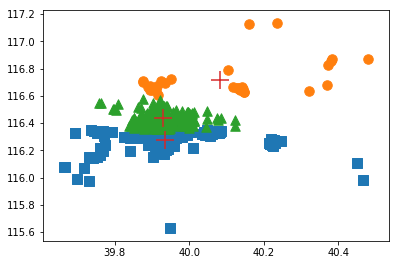

In [41]:
clusterPlaces('D:\\Restaurant_Data_Beijing.txt',3)

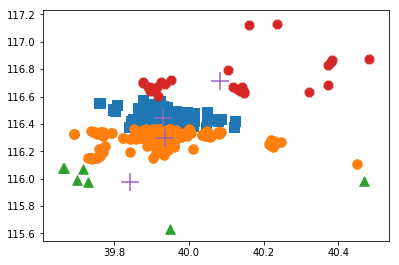

In [42]:
clusterPlaces('D:\\Restaurant_Data_Beijing.txt',4)

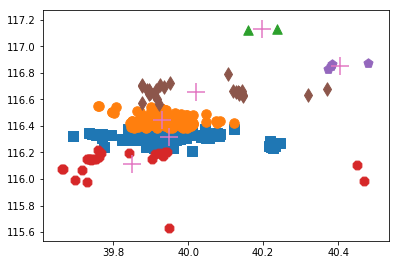

In [46]:
clusterPlaces('D:\\Restaurant_Data_Beijing.txt',6)

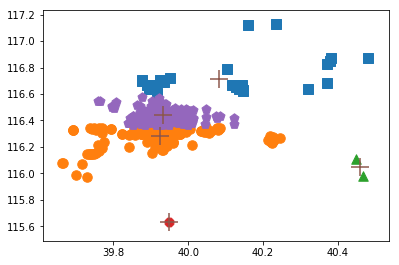

In [47]:
clusterPlaces('D:\\Restaurant_Data_Beijing.txt',5)

[ 0  1 -1  2  0  1  3  2  0  1  3  2  0  1 -1 -1  0  1  3  2  0  1  3  2
  0  1  3  2  0  1  3  2  0  1 -1  2  0  1  3  2  0  1  3  2  0  1  3  2
  0  1  3  2  0  1  3  2  0  1  3  2  0  1  3  2  0  1  3  2  0  1  3  2
  0  1  3  2  0  1 -1  2]


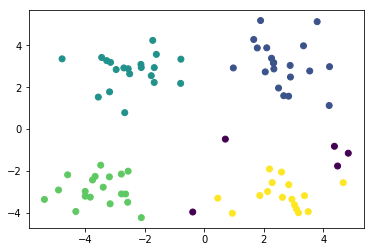

In [126]:
from sklearn.cluster import DBSCAN
pred=DBSCAN(eps=1.5).fit_predict(dataset)
x=[]
y=[]
for i in range(dataset.shape[0]):
    x.append(dataset[i,0])
    y.append(dataset[i,1])
#print(x)
#print(y)
print(pred)
plt.scatter(x,y,c=pred)
plt.show()

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in arccos
  del sys.path[0]


[-1  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  2
  0  0  0  0 -1  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  2  0 -1  3  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  2  0  0  0  0  0  0  3  0  0  0  0 -1  0  0  0 -1  0  0  0  0
  0  0  0  1  0  0  0  3  4  1  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2  0  4  0  0  0 -1
  0  2  0  0 -1  0  2  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  4  0  0  0  4  0  0  2  0  0  0  0  3  0  0  4 -1  0  0  0  0  0  0  0
  0  1  0  0  3  0  0  0  0  3  0  0  0  4  0  0  0  0  0  0  0  4  0  0
  0  0 -1  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1

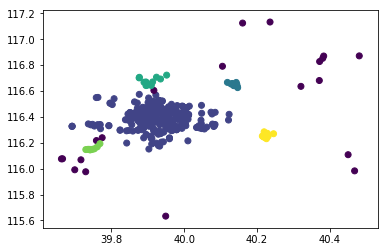

In [150]:
#print(type(dataMat))
#print(dataMat)
#print(dataMat[0])
pred=DBSCAN(eps=4,metric=distSLC2).fit_predict(dataMat)#

#print(x)
#print(y)
#print(pred)
x=[]
y=[]
for i in range(len(dataMat)):
    x.append(dataMat[i][0])
    y.append(dataMat[i][1])
print(pred)
plt.scatter(x,y,c=pred)
plt.show()

In [137]:
def myDBSCAN(data,eps,minpts,caldist):
    n=len(data)
    pred=np.zeros(n)#0表示噪声点
    clo=0
    for sc in range(n):
        if pred[sc]==0:
            nei=[]
            neit=0
            for i in range(n):
                if pred[i]==0 and i!=sc:
                    dis=caldist(data[i],data[sc])
                    if dis<eps:
                        nei.append(i)
                        neit+=1
            if neit>=minpts:
                clo+=1
                pred[sc]=clo
                for i in range(neit):
                    pred[nei[i]]=clo
                q=nei
                he=0
                ta=neit
                while he<ta:
                    now=q[he]
                    nei=[]
                    neit=0
                    num=0
                    for i in range(n):
                        if i==now:
                            continue
                        if pred[i]==0 or pred[i]==clo:
                            dis=caldist(data[now],data[i])
                            if dis<eps:
                                num+=1
                                if pred[i]==0:
                                    nei.append(i)
                                    neit+=1
                    if num>=minpts:
                        for i in range(neit):
                            pred[nei[i]]=clo
                            q.append(nei[i])
                            ta+=1
                    he+=1
    return pred

<class 'numpy.matrix'>
[1. 2. 5. 3. 1. 2. 0. 3. 1. 2. 4. 3. 1. 2. 0. 0. 1. 2. 4. 3. 1. 2. 4. 3.
 1. 2. 4. 3. 1. 2. 4. 3. 1. 2. 5. 3. 1. 2. 4. 3. 1. 2. 4. 3. 1. 2. 4. 3.
 1. 2. 4. 3. 1. 0. 4. 3. 1. 2. 4. 3. 1. 2. 4. 3. 1. 2. 4. 3. 1. 2. 4. 3.
 0. 2. 5. 3. 1. 2. 5. 3.]


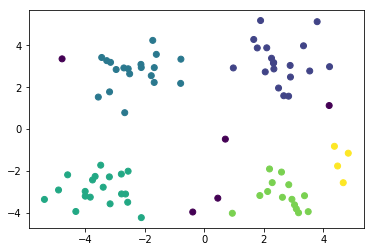

In [141]:
print(type(dataset))
pred=myDBSCAN(dataset,eps=1.3,minpts=3,caldist=distEclud)
x=[]
y=[]
for i in range(dataset.shape[0]):
    x.append(dataset[i,0])
    y.append(dataset[i,1])
#print(x)
#print(y)
print(pred)
plt.scatter(x,y,c=pred)
plt.show()

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 6. 1. 0. 4. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 4. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 4. 5. 2. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 3. 3. 1. 5. 1. 1. 1. 0.
 1. 3. 1. 1. 0. 1. 3. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 5. 1. 1. 1. 5. 1. 1. 6. 1. 1. 1. 1. 4. 1. 1. 5. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 4. 1. 0. 1. 1. 4. 1. 1. 1. 5. 1. 1. 1. 1. 1. 0. 1. 5. 1. 1.
 1. 1. 0. 1. 0. 1. 3. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 6. 1. 1. 1. 1. 1. 1. 1. 2.

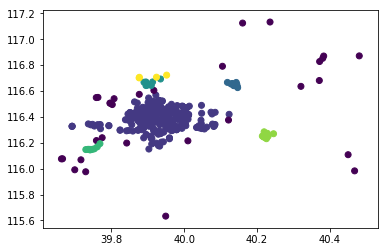

In [152]:
def distSLC2(vecA, vecB):
    
    #pi为圆周率，在导入numpy时就会导入的了
    #sin(),cos()函数输出的是弧度为单位的数据
    #由于输入的经纬度是以角度为单位的，故要将其除以180再乘以pi转换为弧度
    #设所求点A ，纬度β1 ，经度α1 ；点B ，纬度β2 ，经度α2。则距离
    #距离 S=R·arc cos[cosβ1cosβ2cos（α1-α2）+sinβ1sinβ2]
    
    a = np.sin(vecA[1]*np.pi/180) * np.sin(vecB[1]*np.pi/180)
    b = np.cos(vecA[1]*np.pi/180) * np.cos(vecB[1]*np.pi/180) * \
                      np.cos(np.pi * (vecB[0]-vecA[0]) /180)

    return np.arccos(a + b)*6371.0 #6371.0为地球半径
#print(type(dataMat[i]))
pred=myDBSCAN(dataMat,eps=3,minpts=3,caldist=distSLC2)
x=[]
y=[]
for i in range(len(dataMat)):
    x.append(dataMat[i][0])
    y.append(dataMat[i][1])
#print(x)
#print(y)
print(pred)
plt.scatter(x,y,c=pred)
plt.show()

In [165]:
def calSC(data,caldist,pred):
    SCsum=0
    n=len(data)
    for i in range(n):
        dis={}
        num={}
        for j in range(n):
            if (j==i):
                continue
            if not(pred[j] in dis):
                dis[pred[j]]=0
                num[pred[j]]=0
            dis[pred[j]]=dis[pred[j]]+caldist(data[i],data[j])
            num[pred[j]]=num[pred[j]]+1
        b=np.inf
        for x in dis:
            if (x==pred[i]):
                a=dis[x]/num[x]
                continue
            te=dis[x]/num[x]
            if te<b:
                b=te
        SCsum+=(b-a)/max(a,b)
    return SCsum/n

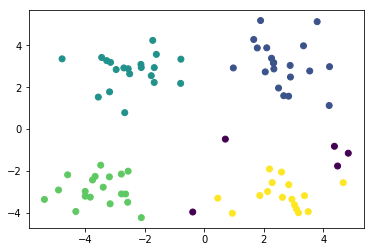

0.5955981706907995


In [170]:
pred=DBSCAN(eps=1.5).fit_predict(dataset)
x=[]
y=[]
for i in range(dataset.shape[0]):
    x.append(dataset[i,0])
    y.append(dataset[i,1])
plt.scatter(x,y,c=pred)
plt.show()
print(calSC(dataset,distEclud,pred))

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in arccos
  del sys.path[0]


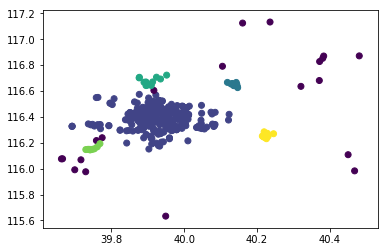

0.379059446602898


In [175]:
pred=DBSCAN(eps=4,metric=distSLC2).fit_predict(dataMat)#
x=[]
y=[]
for i in range(len(dataMat)):
    x.append(dataMat[i][0])
    y.append(dataMat[i][1])
plt.scatter(x,y,c=pred)
plt.show()
print(calSC(dataMat,distSLC2,pred))

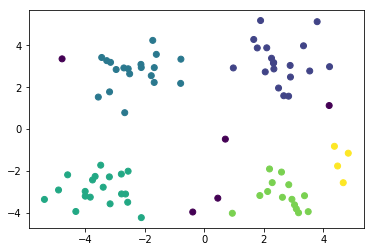

0.5852553702012335


In [178]:
pred=myDBSCAN(dataset,eps=1.3,minpts=3,caldist=distEclud)
x=[]
y=[]
for i in range(dataset.shape[0]):
    x.append(dataset[i,0])
    y.append(dataset[i,1])
plt.scatter(x,y,c=pred)
plt.show()
print(calSC(dataset,distEclud,pred))

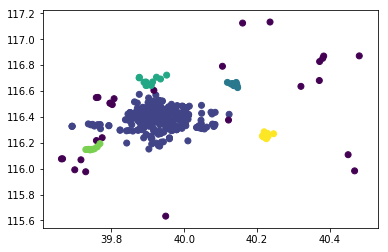

0.3734920626546503


In [182]:
pred=myDBSCAN(dataMat,eps=3.5,minpts=4,caldist=distSLC2)
x=[]
y=[]
for i in range(len(dataMat)):
    x.append(dataMat[i][0])
    y.append(dataMat[i][1])
plt.scatter(x,y,c=pred)
plt.show()
print(calSC(dataMat,distSLC2,pred))

[array([ 2.6507738, -2.7901905], dtype=float32), array([2.6265302, 3.1086802], dtype=float32), array([-3.5397387, -2.8938434], dtype=float32), array([-2.461543 ,  2.7873757], dtype=float32)] [1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 0, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2]


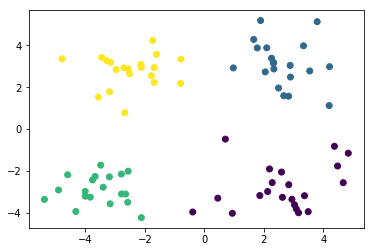

0.6566383892355745


In [222]:
import tensorflow as tf
import random
def tfkmeans1(data,k,iterations):
    n=len(data)
    dim=len(data[0])
    indices=list(range(n))
    random.shuffle(indices)
    graph=tf.Graph()
    with graph.as_default():
        sess=tf.Session()
        centroids=[tf.Variable(data[indices[i]]) for i in range(k)]
        centroidv=tf.placeholder("float32",[dim])
        cent_assigns=[]
        for centroid in centroids:
            cent_assigns.append(tf.assign(centroid,centroidv))
        assignments=[tf.Variable(0) for i in range(n)]
        assignmentv=tf.placeholder("int32")
        cluster_assigns=[]
        for assignment in assignments:
            cluster_assigns.append(tf.assign(assignment,assignmentv))
        mean_input=tf.placeholder("float",[None,dim])
        mean_op=tf.reduce_mean(mean_input,0)
        v1=tf.placeholder("float",[dim])
        v2=tf.placeholder("float",[dim])
        euclid_dist=tf.sqrt(tf.reduce_sum(tf.pow(tf.add(v1,tf.negative(v2)),2)))
        centroid_distances=tf.placeholder("float",[k])
        cluster_assignment=tf.argmin(centroid_distances,0)
        init_op=tf.global_variables_initializer()
        sess.run(init_op)
        for itern in range(iterations):
            for vector_n in range(n):
                vect=data[vector_n]
                distances=[sess.run(euclid_dist,feed_dict={v1:vect,v2:sess.run(centroid)}) for centroid in centroids]
                assignment=sess.run(cluster_assignment,feed_dict={centroid_distances:distances})
                sess.run(cluster_assigns[vector_n],feed_dict={assignmentv:assignment})
            for cluster_n in range(k):
                assigned_vects=[data[i] for i in range(n) if sess.run(assignments[i])==cluster_n]
                new_location=sess.run(mean_op,feed_dict={mean_input:np.array(assigned_vects)})
                sess.run(cent_assigns[cluster_n],feed_dict={centroidv:new_location})
    centroids=sess.run(centroids)
    assignments=sess.run(assignments)
    return centroids,assignments
#print(len(dataset[1]))
#dataset2=[]
#for i in range(len(dataset)):
#    dataset2.append(dataset[i])
#print(dataset2)
#print(type(dataset))
dataset2=dataset.tolist()
center,pred=tfkmeans1(dataset2,4,50)        
print(center,pred)
x=[]
y=[]
for i in range(dataset.shape[0]):
    x.append(dataset[i,0])
    y.append(dataset[i,1])
plt.scatter(x,y,c=pred)
plt.show()
print(calSC(dataset,distEclud,pred))

[array([ 39.917473, 116.45779 ], dtype=float32), array([ 39.81905, 116.23526], dtype=float32), array([ 40.022312, 116.323235], dtype=float32), array([ 40.20307, 116.74499], dtype=float32)] [2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 3, 3, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 3, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 3, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 2, 3, 0, 0, 1, 2, 0, 0, 0, 3, 1, 0, 0, 1, 2, 3, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 

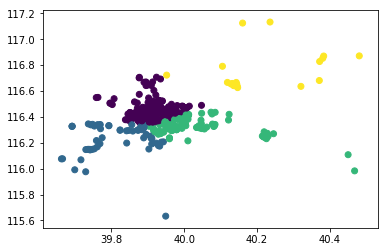

0.3279492967106382


In [245]:
import tensorflow as tf
import random
def tfkmeans2(data,k,iterations):
    n=len(data)
    dim=len(data[0])
    indices=list(range(n))
    random.shuffle(indices)
    graph=tf.Graph()
    with graph.as_default():
        sess=tf.Session()
        centroids=[tf.Variable(data[indices[i]]) for i in range(k)]
        centroidv=tf.placeholder("float32",[dim])
        cent_assigns=[]
        for centroid in centroids:
            cent_assigns.append(tf.assign(centroid,centroidv))
        assignments=[tf.Variable(0) for i in range(n)]
        assignmentv=tf.placeholder("int32")
        cluster_assigns=[]
        for assignment in assignments:
            cluster_assigns.append(tf.assign(assignment,assignmentv))
        mean_input=tf.placeholder("float",[None,dim])
        mean_op=tf.reduce_mean(mean_input,0)
        v1=tf.placeholder("float",[dim])
        v2=tf.placeholder("float",[dim])
        euclid_dist=tf.sqrt(tf.reduce_sum(tf.pow(tf.add(v1,tf.negative(v2)),2)))
        centroid_distances=tf.placeholder("float",[k])
        cluster_assignment=tf.argmin(centroid_distances,0)
        init_op=tf.global_variables_initializer()
        sess.run(init_op)
        for itern in range(iterations):
            for vector_n in range(n):
                vect=data[vector_n]
                distances=[sess.run(euclid_dist,feed_dict={v1:vect,v2:sess.run(centroid)}) for centroid in centroids]
                assignment=sess.run(cluster_assignment,feed_dict={centroid_distances:distances})
                sess.run(cluster_assigns[vector_n],feed_dict={assignmentv:assignment})
            for cluster_n in range(k):
                assigned_vects=[data[i] for i in range(n) if sess.run(assignments[i])==cluster_n]
                new_location=sess.run(mean_op,feed_dict={mean_input:np.array(assigned_vects)})
                sess.run(cent_assigns[cluster_n],feed_dict={centroidv:new_location})
    centroids=sess.run(centroids)
    assignments=sess.run(assignments)
    return centroids,assignments
center,pred=tfkmeans2(dataMat,4,50)        
print(center,pred)
x=[]
y=[]
for i in range(len(dataMat)):
    x.append(dataMat[i][0])
    y.append(dataMat[i][1])
plt.scatter(x,y,c=pred)
plt.show()
print(calSC(dataMat,distSLC2,pred))